In [2]:
import pandas as pd

# Data Example

In [3]:
# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [4]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [5]:
df.head(10)

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


# Split feature vectors and labels

In [6]:
# X is feature vectors
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]

In [7]:
X.head(9)

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0


In [8]:
# Y is labels

In [9]:
Y = df[['body_shape']]

In [10]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


# Rescaling feature vectors to all have the same scale

In [11]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
#x_std

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Covariance Matrix of features

In [12]:
import numpy as np

In [13]:
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
#print(covariance_matrix)

# Eigenvectors and Eigenvalues from Covariance Matrix

In [14]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [15]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 0.508005    0.0169937  -0.84711404  0.11637853  0.10244985]
 [ 0.44660335  0.36890361  0.12808055 -0.63112016 -0.49973822]
 [ 0.38377913 -0.70804084  0.20681005 -0.40305226  0.38232213]
 [ 0.42845209  0.53194699  0.3694462   0.22228235  0.58954327]
 [-0.46002038  0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [16]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [17]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)

0.7318321731427544

# Project data point onto selected Eigen Vector

In [18]:
projected_X = x_std.dot(eig_vecs.T[0])

In [19]:
projected_X

array([-2.22600943, -0.0181432 ,  1.76296611, -2.73542407,  3.02711544,
       -2.14702579, -0.37142473,  2.59239883, -0.39347815,  0.50902498])

In [20]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [21]:
result.head(10)

,PC1,y-axis,label
0,-2.226009,0.0,Skinny
1,-0.018143,0.0,Normal
2,1.762966,0.0,Fat
3,-2.735424,0.0,Skinny
4,3.027115,0.0,Fat
5,-2.147026,0.0,Skinny
6,-0.371425,0.0,Normal
7,2.592399,0.0,Fat
8,-0.393478,0.0,Normal
9,0.509025,0.0,Fat


# Plot the result

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'PCA result')

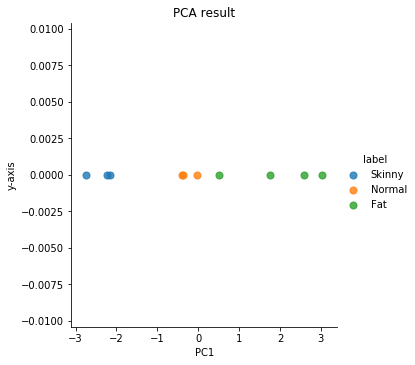

In [23]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')

# bonus #1 scikit-learn PCA

In [24]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

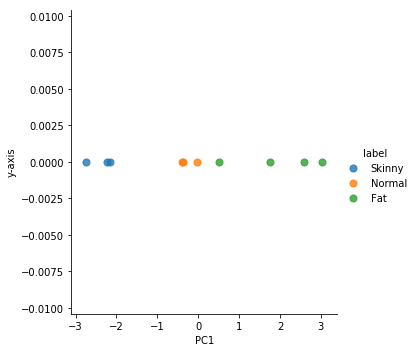

In [25]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# bonus #2 PCA for Only two feature of iris data

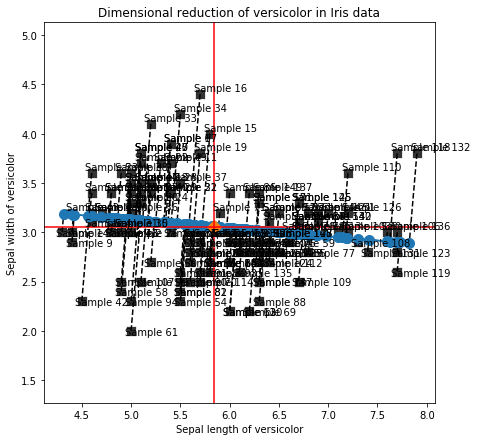

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
N = len(X2)
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "Sample {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("Sepal length of versicolor")
plt.ylabel("Sepal width of versicolor")
plt.title("Dimensional reduction of versicolor in Iris data")
plt.axis("equal")
plt.show()